In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster


In [2]:
df=pd.read_csv("../data/Trained_selected_features.csv")
df.head()

,exang,ca,cp_3.0,cp_4.0,thal_7.0,target
0,0.0,0.333333,0,0,0,1
1,0.0,0.000000,1,0,0,0
2,0.0,0.333333,1,0,0,0
3,0.0,0.000000,0,0,0,0
4,0.0,0.000000,0,0,0,0


c:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

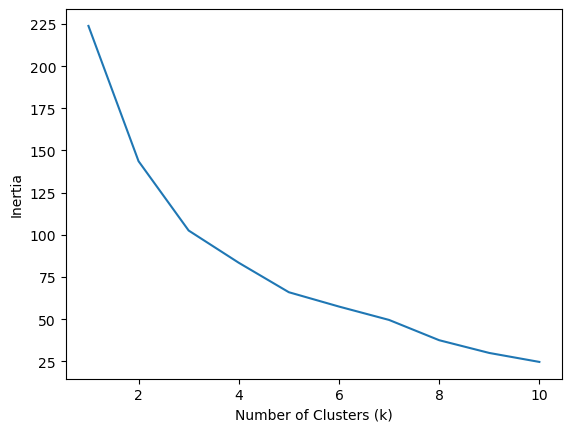

In [3]:

features=['exang', 'ca', 'cp_3.0', 'cp_4.0', 'thal_7.0']
X=df[features]
y=df['target']
results=[]
##let's try elbow method to determine K
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    results.append(kmeans.inertia_)
plt.plot(range(1,11), results)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()


c:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

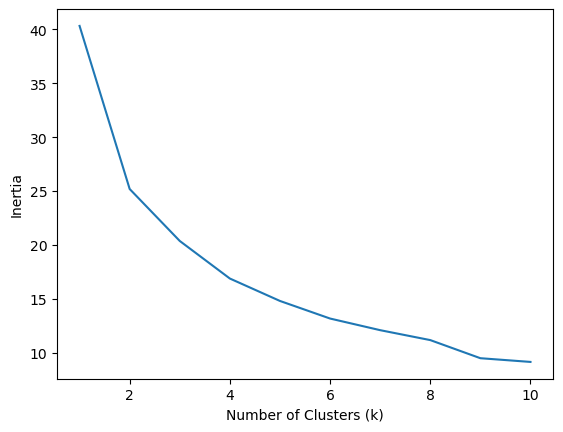

In [4]:
df=pd.read_csv("../data/Trained_pca_heart.csv")
features=['PC1', 'PC2', 'PC3']
X=df[features]
y=df['target']
results=[]
##let's try elbow method to determine K
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    kmeans.inertia_
    results.append(kmeans.inertia_)
plt.plot(range(1,11),results)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

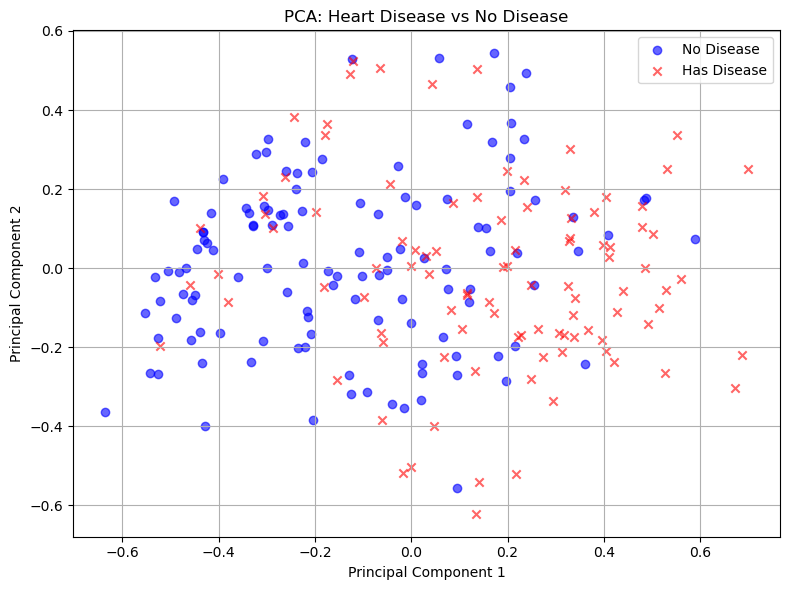

In [5]:

from sklearn.decomposition import PCA

df = pd.read_csv("../data/Trained_Cleaned_heart_data.csv")
# 1. Feature selection
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']



X = df[features]
y = df['target']  


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


# 5. Plot the PCA components colored by target
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label='No Disease', alpha=0.6, c='blue', marker='o')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label='Has Disease', alpha=0.6, c='red', marker='x')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Heart Disease vs No Disease')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:

import plotly.express as px

# Load your PCA-transformed dataset
df = pd.read_csv("../data/Trained_pca_heart.csv")

# 3D interactive scatter plot
fig = px.scatter_3d(
    df,
    x='PC1', y='PC2', z='PC3',
    color='target', 
    color_discrete_map={0: 'blue', 1: 'red'},
    labels={ 'Heart Disease'},
    title='🫀 Interactive 3D PCA Visualization (Heart Disease)'
)

fig.update_traces(marker=dict(size=5, opacity=0.7))
fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    legend=dict(title=''),
    margin=dict(l=0, r=0, b=0, t=30)
)

fig.show()

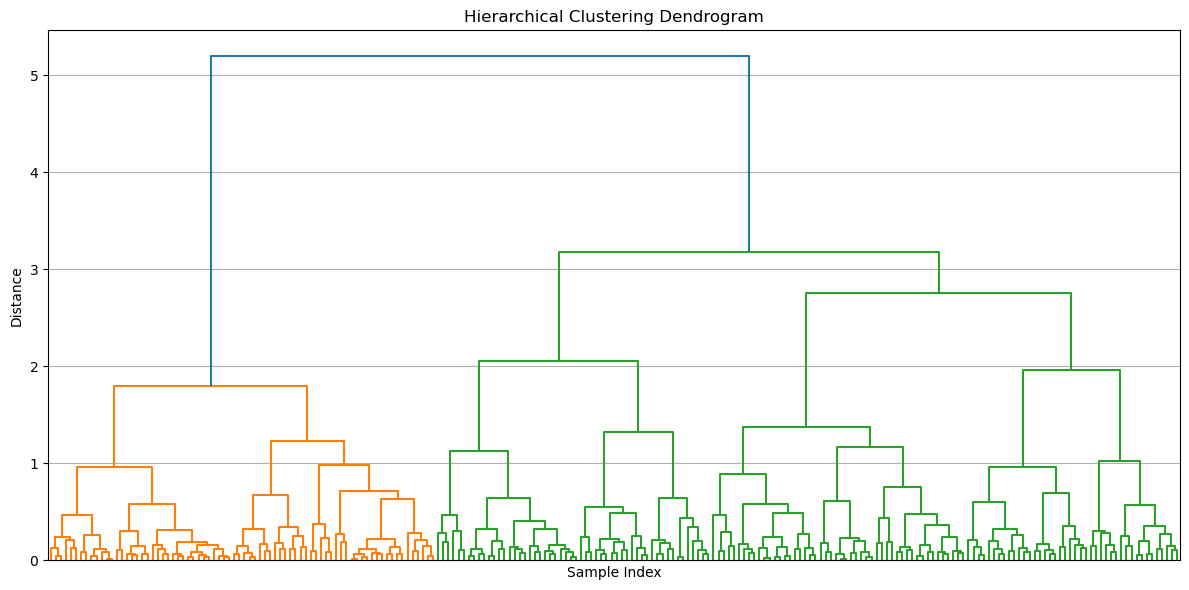

In [7]:

from scipy.cluster.hierarchy import dendrogram, linkage



df = pd.read_csv("../data/Trained_pca_heart.csv")


X = df[['PC1', 'PC2', 'PC3']]



linked = linkage(X, method='ward')  

plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort=True,
           show_leaf_counts=False,
           no_labels=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.tight_layout()
plt.show()

c:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Clustering Accuracy: 0.689


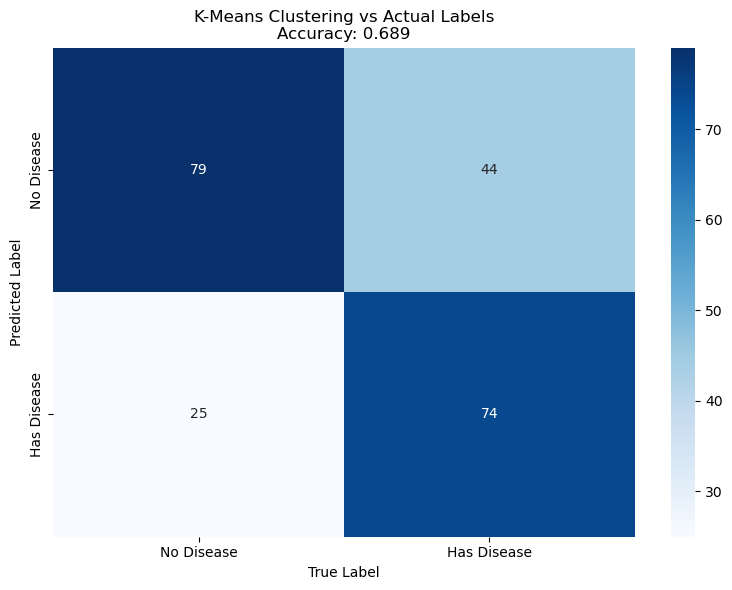

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from scipy.optimize import linear_sum_assignment

# Fix KMeans memory leak
os.environ['OMP_NUM_THREADS'] = '1'

# Load data
df = pd.read_csv("../data/Trained_pca_heart.csv")
X = df[['PC1', 'PC2', 'PC3']]
y_true = df['target']

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)

# Match labels
def match_labels(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    row_ind, col_ind = linear_sum_assignment(-matrix)
    new_labels = np.zeros_like(y_pred)
    for i in range(len(col_ind)):
        new_labels[y_pred == col_ind[i]] = row_ind[i]
    return new_labels

y_pred_matched = match_labels(y_true, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_matched)
print(f"Clustering Accuracy: {accuracy:.3f}")

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_matched)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Has Disease'],
            yticklabels=['No Disease', 'Has Disease'])

plt.title(f"K-Means Clustering vs Actual Labels\nAccuracy: {accuracy:.3f}")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.tight_layout()
plt.show()

c:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Clustering Accuracy: 0.739


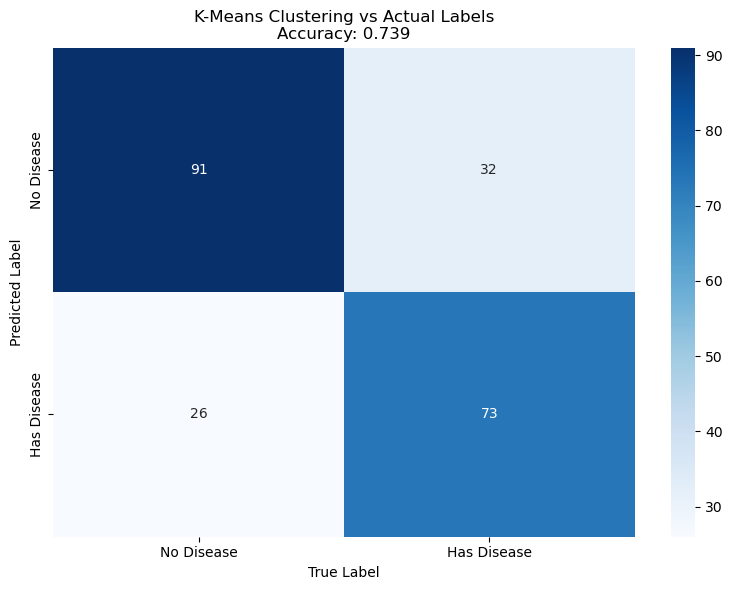

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from scipy.optimize import linear_sum_assignment

# Fix KMeans memory leak
os.environ['OMP_NUM_THREADS'] = '1'

# Load data
df = pd.read_csv("../data/Trained_selected_features.csv")
X = df.drop('target', axis=1)
y_true = df['target']

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)

# Match labels
def match_labels(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    row_ind, col_ind = linear_sum_assignment(-matrix)
    new_labels = np.zeros_like(y_pred)
    for i in range(len(col_ind)):
        new_labels[y_pred == col_ind[i]] = row_ind[i]
    return new_labels

y_pred_matched = match_labels(y_true, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_matched)
print(f"Clustering Accuracy: {accuracy:.3f}")

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_matched)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Has Disease'],
            yticklabels=['No Disease', 'Has Disease'])

plt.title(f"K-Means Clustering vs Actual Labels\nAccuracy: {accuracy:.3f}")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.tight_layout()
plt.show()

c:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Clustering Accuracy: 0.739


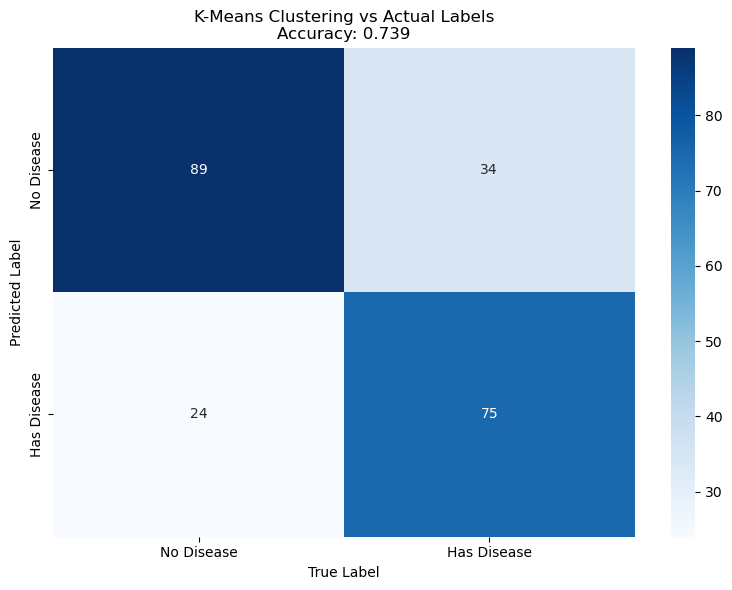

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from scipy.optimize import linear_sum_assignment

# Fix KMeans memory leak
os.environ['OMP_NUM_THREADS'] = '1'

# Load data
df = pd.read_csv("../data/Trained_Cleaned_heart_data.csv")
X = df.drop('target', axis=1)
y_true = df['target']

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)

# Match labels
def match_labels(y_true,  y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    row_ind, col_ind = linear_sum_assignment(-matrix)
    new_labels = np.zeros_like(y_pred)
    for i in range(len(col_ind)):
        new_labels[y_pred == col_ind[i]] = row_ind[i]
    return new_labels

y_pred_matched = match_labels(y_true, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_matched)
print(f"Clustering Accuracy: {accuracy:.3f}")

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_matched)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Has Disease'],
            yticklabels=['No Disease', 'Has Disease'])

plt.title(f"K-Means Clustering vs Actual Labels\nAccuracy: {accuracy:.3f}")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.tight_layout()
plt.show()